# Noise Cross Term - is it important?

Let's do a simple simulation of two uncorrelated, independent, random noise vectors (A and B), and see if the rms of C = A + B depends only on sigma_A and sigma_B or if it's more complicated.

In [114]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 10]

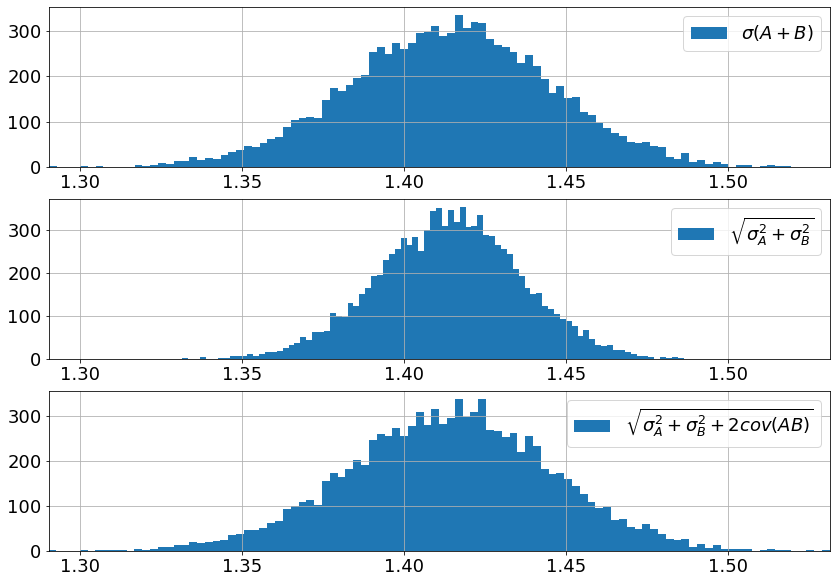

In [115]:
# Set up vectors to store values as we loop, for later plotting.
rms_1_vec = np.array([])
rms_2_vec = np.array([])
rms_3_vec = np.array([])
cov_vec = np.array([])
sigA_vec = np.array([])
sigB_vec = np.array([])

vecsize = 1000  # this is how many elements A and B will have.
Ntrials = 10000  # This is how many realizations to do

# Loop through realizations.
for trial in np.arange(Ntrials):
    
    # Create A, B and C = A + B.
    A = np.random.randn(vecsize)
    B = np.random.randn(vecsize)
    C = A+B
    
    # Calculate stdev of A, B and covariance
    sigA = np.std(A,ddof=1)  
    sigB = np.std(B,ddof=1)
    covAB = np.sum(A*B)/(A.size-1)
    # Store them
    sigA_vec = np.append(sigA_vec,sigA)
    sigB_vec = np.append(sigB_vec,sigB)
    cov_vec = np.append(cov_vec,covAB)
    
    # each version of "rms" is a different way of estimating what the rms of C should be.
    # actual stdev
    rms_1 = np.std(C, ddof=1)    
    
    # naiive formula
    rms_2 = np.sqrt(sigA**2 + sigB**2)
    
    # use covariance too, which should have zero mean b/c A and B are independent.  
    # any covariance in a given realization is a "chance correlation"
    rms_3 = np.sqrt(sigA**2 + sigB**2 + 2*covAB) 
    
    # save those rms's to vectors
    rms_1_vec = np.append(rms_1_vec,rms_1)
    rms_2_vec = np.append(rms_2_vec,rms_2)
    rms_3_vec = np.append(rms_3_vec,rms_3)

# Plot 3 panels of histograms, one for each version of the rms above
# Top panels is "truth"
# Middle panel is "naiive"
# Bottom panel is "with covariance"
xmin = np.min(rms_1_vec)
xmax = np.max(rms_1_vec)
plt.subplot(3,1,1)
plt.hist(rms_1_vec, bins=100,label='$\sigma(A+B)$')
plt.legend()
plt.xlim([xmin,xmax])
plt.grid()

plt.subplot(3,1,2)
plt.hist(rms_2_vec, bins=100,label='$\sqrt{\sigma_A^2 + \sigma_B^2}$')
plt.legend()
plt.xlim([xmin,xmax])
plt.grid()

plt.subplot(3,1,3)
plt.hist(rms_3_vec, bins=100,label='$\sqrt{\sigma_A^2 + \sigma_B^2 + 2 cov(AB)}$')
plt.legend()
plt.xlim([xmin,xmax])
plt.grid()


The plot above shows us that the naiive estimate has a narrower distribution than the real sigma_C.  The estimate that uses the covariance has a width much closer to that of sigma_C.

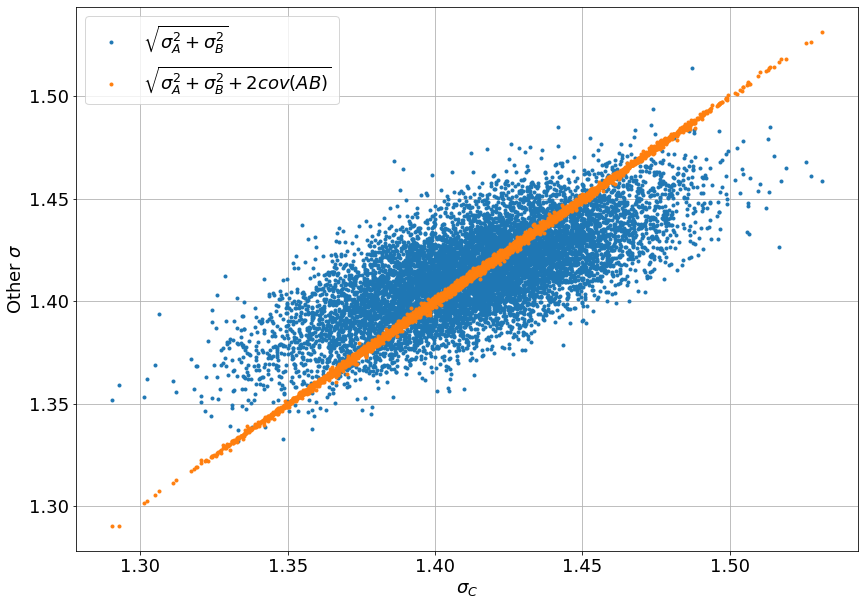

In [116]:
# Plot rms1 vs rms2, and rms1 vs rms3
#
plt.plot(rms_1_vec,rms_2_vec,'.',label='$\sqrt{\sigma_A^2 + \sigma_B^2}$')
plt.plot(rms_1_vec,rms_3_vec,'.',label='$\sqrt{\sigma_A^2 + \sigma_B^2 + 2 cov(AB)}$')
plt.xlabel('$\sigma_C$')
plt.ylabel('Other $\sigma$')
plt.legend()
plt.grid()

The plot above shows us that the estimate of sigma_C is much better if we use the (chance) covariance term.

# Sanity check
The next plot is a sanity check, to make sure the sigma_A, sigma_B, and cov(A,B) distributions are behaving.  You can see the widths of these change if you change vecsize, abvove.

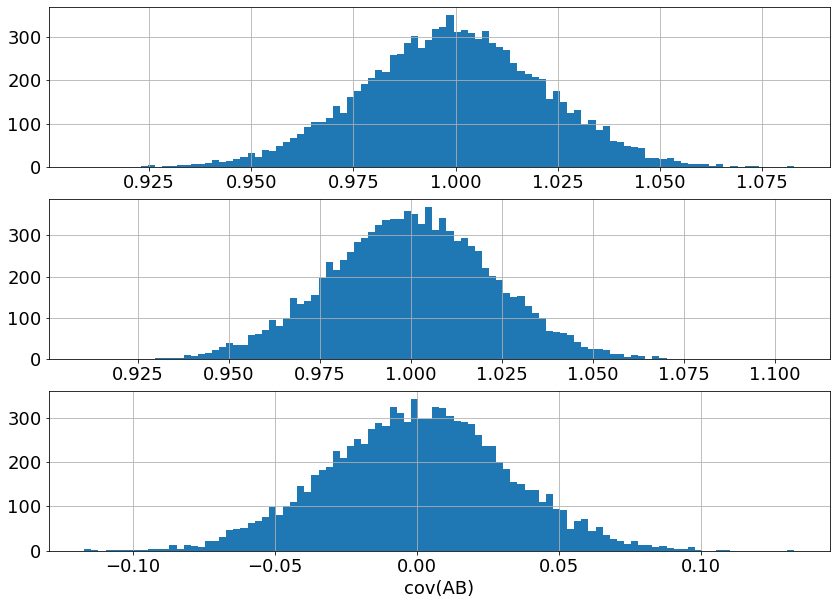

In [117]:
# Three panel plot 

plt.subplot(3,1,1)
plt.hist(sigA_vec,bins=100)
plt.xlabel('$\sigma_A$')
plt.grid()

plt.subplot(3,1,2)
plt.hist(sigB_vec,bins=100)
plt.xlabel('$\sigma_B$')
plt.grid()

plt.subplot(3,1,3)
plt.hist(cov_vec,bins=100)
plt.xlabel('cov(AB)')
plt.grid()